In [1]:
import mysql.connector as mariadb
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Cap1.com').getOrCreate()

Spark libraries imported and session created.

In [57]:
df_branch = spark.read.json("credit_card_dataset\cdw_sapp_branch.json")
df_credit = spark.read.json("credit_card_dataset\cdw_sapp_credit.json")
df_customer = spark.read.json("credit_card_dataset\cdw_sapp_custmer.json")

In [35]:
df_branch.printSchema

<bound method DataFrame.printSchema of DataFrame[BRANCH_CITY: string, BRANCH_CODE: bigint, BRANCH_NAME: string, BRANCH_PHONE: string, BRANCH_STATE: string, BRANCH_STREET: string, BRANCH_ZIP: bigint, LAST_UPDATED: string]>

In [36]:
df_credit.printSchema

<bound method DataFrame.printSchema of DataFrame[BRANCH_CODE: bigint, CREDIT_CARD_NO: string, CUST_SSN: bigint, DAY: bigint, MONTH: bigint, TRANSACTION_ID: bigint, TRANSACTION_TYPE: string, TRANSACTION_VALUE: double, YEAR: bigint]>

In [10]:
df_customer.printSchema

<bound method DataFrame.printSchema of DataFrame[APT_NO: string, CREDIT_CARD_NO: string, CUST_CITY: string, CUST_COUNTRY: string, CUST_EMAIL: string, CUST_PHONE: bigint, CUST_STATE: string, CUST_ZIP: string, FIRST_NAME: string, LAST_NAME: string, LAST_UPDATED: string, MIDDLE_NAME: string, SSN: bigint, STREET_NAME: string]>

Now connecting to MariaDB and creating the database with 3 tables.

In [14]:
con = mariadb.connect(
    host = "localhost",
    user = "root",
    password = "password",
)
print("connecting to MariaDB...")
cur = con.cursor()
st = "CREATE DATABASE creditcard_capstone"
cur.execute(st)
print("creditcard_capstone database created")
con.close()

connecting to MariaDB...
creditcard_capstone database created


In [5]:
# df_branch.write.format("jdbc") \
#   .mode("append") \
#   .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
#   .option("dbtable", "CDW_SAPP_BRANCH") \
#   .option("user", "root") \
#   .option("password", "password") \
#   .save()

df_credit.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "CDW_SAPP_CREDIT_CARDwhat") \
  .option("user", "root") \
  .option("password", "password") \
  .save()

# df_customer.write.format("jdbc") \
#   .mode("append") \
#   .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
#   .option("dbtable", "CDW_SAPP_CUSTOMER") \
#   .option("user", "root") \
#   .option("password", "password") \
#   .save()

Soooo - why is MariaDB registering a different number of rows each time I import the credit file?

JEREMIAH - copy/paste the following into a py file...console thing...or do what you learn next week (for part 2)

TRANSACTION DETAILS MODULE
1)    Used to display the transactions made by customers living in a given zip code for a given month and year. Order by day in descending order.
2)    Used to display the number and total values of transactions for a given type.
3)    Used to display the number and total values of transactions for branches in a given state.

CUSTOMER DETAILS MODULE

1) Used to check the existing account details of a customer.
2) Used to modify the existing account details of a customer.
3) Used to generate a monthly bill for a credit card number for a given month and year.
4) Used to display the transactions made by a customer between two dates. Order by year, month, and day in descending order.



In [59]:
df_branch.createTempView("branch")
df_credit.createTempView("credit")
df_customer.createTempView("customer")

In [9]:
spark.sql("SELECT * from branch").show(10)

+-----------------+-----------+------------+------------+------------+-----------------+----------+--------------------+
|      BRANCH_CITY|BRANCH_CODE| BRANCH_NAME|BRANCH_PHONE|BRANCH_STATE|    BRANCH_STREET|BRANCH_ZIP|        LAST_UPDATED|
+-----------------+-----------+------------+------------+------------+-----------------+----------+--------------------+
|        Lakeville|          1|Example Bank|  1234565276|          MN|     Bridle Court|     55044|2018-04-18T16:51:...|
|          Huntley|          2|Example Bank|  1234618993|          IL|Washington Street|     60142|2018-04-18T16:51:...|
|SouthRichmondHill|          3|Example Bank|  1234985926|          NY|    Warren Street|     11419|2018-04-18T16:51:...|
|       Middleburg|          4|Example Bank|  1234663064|          FL| Cleveland Street|     32068|2018-04-18T16:51:...|
|    KingOfPrussia|          5|Example Bank|  1234849701|          PA|      14th Street|     19406|2018-04-18T16:51:...|
|         Paterson|          7|E

Part 3. Data Analysis and Visualization

Functional Requirements 3.1
Find and plot which transaction type has a high rate of transactions.
Note: Take a screenshot of the graphs. 

Functional Requirements 3.2
Find and plot which state has a high number of customers.
Note: Take a screenshot of the graphs. 

Functional Requirements 3.3
Find and plot the sum of all transactions for each customer, and which customer has the highest transaction amount.
hint(use CUST_SSN).
Note: Take a screenshot of the graphs. 

In [46]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

In [58]:
df_cred_pd = df_credit.toPandas()

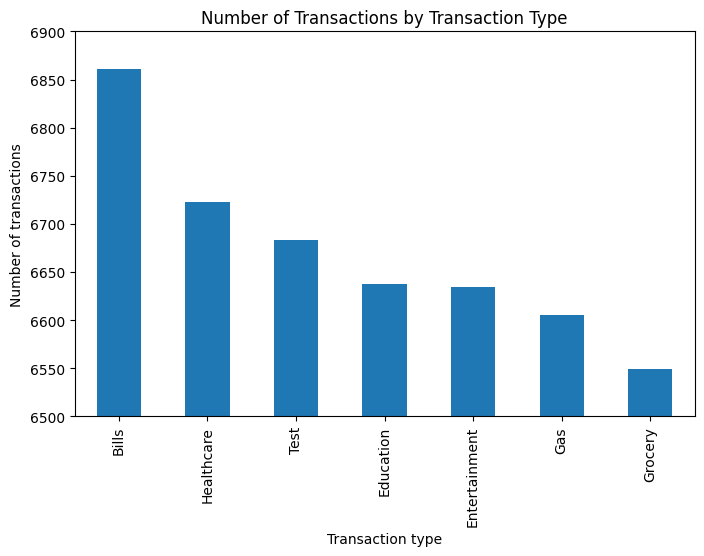

In [32]:
df_cred_pd['TRANSACTION_TYPE'].value_counts().plot(kind='bar', figsize=(8, 5))
#on a graph that starts at 0, it is hard to see much difference in counts on the y axis for these types, so 
#this graph has the limits placed on the y axis which will frame the values in a clearer way.
pyplot.ylim(6500,6900)
pyplot.title('Number of Transactions by Transaction Type')
# add y-label
pyplot.ylabel('Number of transactions')
# add x-label
pyplot.xlabel('Transaction type')

pyplot.show()

In [36]:
df_cust_pd = df_customer.toPandas()

In [40]:
df_cust_pd['CUST_STATE'].value_counts()

NY    96
GA    73
PA    72
FL    64
IL    58
NJ    53
MD    50
CA    45
OH    44
MI    44
VA    39
NC    37
TX    33
MA    33
SC    30
WI    29
MN    28
MS    24
IA    21
KY    17
WA    16
CT    14
IN    13
MT     9
AR     5
AL     5
Name: CUST_STATE, dtype: int64

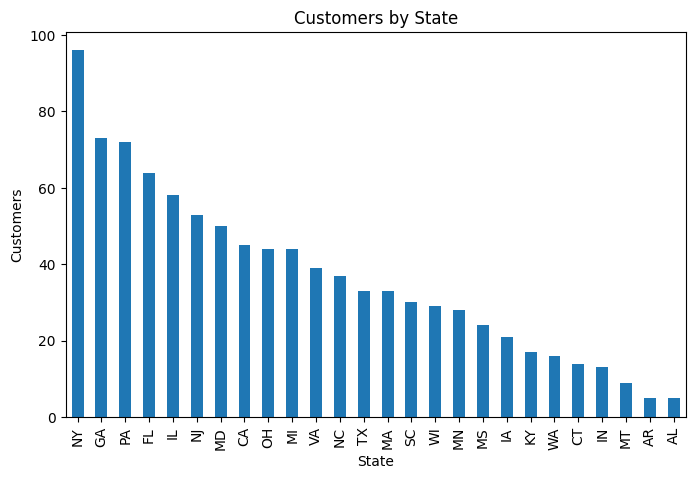

In [41]:
df_cust_pd['CUST_STATE'].value_counts().plot(kind='bar', figsize=(8, 5))

# add a title to the histogram
pyplot.title('Customers by State')
# add y-label
pyplot.ylabel('Customers')
# add x-label
pyplot.xlabel('State')

pyplot.show()

Try this with Spark SQL too, since it could mean either thing (group by SSN)...and/but also can try to figure out other stats models to use. 

In [11]:
spark.sql("SELECT CUST_STATE, COUNT(DISTINCT SSN) AS TOTAL_CUSTOMERS \
            FROM customer GROUP BY CUST_STATE ORDER BY TOTAL_CUSTOMERS DESC").show() 

+----------+---------------+
|CUST_STATE|TOTAL_CUSTOMERS|
+----------+---------------+
|        NY|             96|
|        GA|             73|
|        PA|             72|
|        FL|             64|
|        IL|             58|
|        NJ|             53|
|        MD|             50|
|        CA|             45|
|        MI|             44|
|        OH|             44|
|        VA|             39|
|        NC|             37|
|        TX|             33|
|        MA|             33|
|        SC|             30|
|        WI|             29|
|        MN|             28|
|        MS|             24|
|        IA|             21|
|        KY|             17|
+----------+---------------+
only showing top 20 rows



In [32]:
df_cust_state = spark.sql("SELECT CUST_STATE, COUNT(DISTINCT SSN) AS TOTAL_CUSTOMERS \
            FROM customer GROUP BY CUST_STATE ORDER BY TOTAL_CUSTOMERS DESC").toPandas()
df_cust_state.head()

,CUST_STATE,TOTAL_CUSTOMERS
0,NY,96
1,GA,73
2,PA,72
3,FL,64
4,IL,58


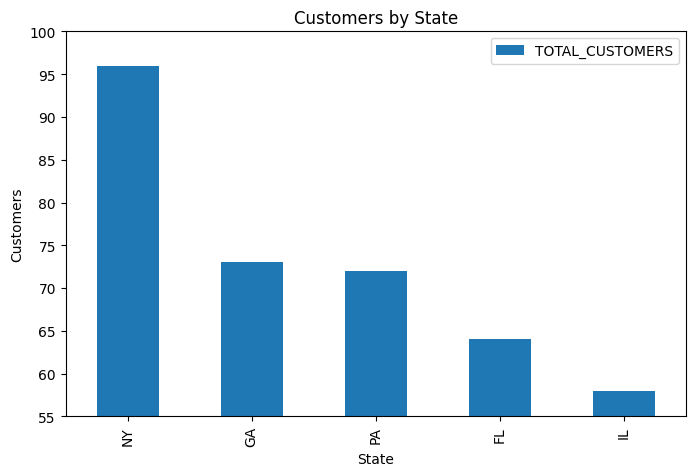

In [34]:
df_cust_state.head().plot(kind='bar', x = 'CUST_STATE', y = 'TOTAL_CUSTOMERS', figsize=(8, 5))

# add a title to the histogram
pyplot.title('Customers by State')
# add y-label
pyplot.ylabel('Customers')
# add x-label
pyplot.xlabel('State')
pyplot.ylim(55,100)

pyplot.show()

The next one should definitely use SQL.
Functional Requirements 3.3
Find and plot the sum of all transactions for each customer, and which customer has the highest transaction amount.
hint(use CUST_SSN).
Note: Take a screenshot of the graphs. 

---this also has a double meaning, so may as well do both meanings.

SELECT sum('TRANSACTION_VALUE') as Total_Transactions
from credit JOIN customer.SSN ON credit.CUST_SSN 
GROUPBY CUST_SSN
ORDER BY Total_Transactions DESC

SELECT count('TRANSACTION_VALUE') as Count_Transactions
from credit JOIN customer.SSN ON credit.CUST_SSN 
GROUP BY CUST_SSN
ORDER BY Count_Transactions DESC

In [12]:
df_cust_val = spark.sql("SELECT CUST_SSN, SUM(TRANSACTION_VALUE) AS TOTAL_VALUE \
            FROM credit GROUP BY CUST_SSN ORDER BY TOTAL_VALUE DESC") 

In [18]:
df_cust_val = df_cust_val.toPandas()

In [19]:
df_cust_val

,CUST_SSN,TOTAL_VALUE
0,123451125,5633.07
1,123452783,5548.14
2,123453486,5476.08
3,123458668,5314.97
4,123456678,5261.03
...,...,...
947,123455652,73.59
948,123453375,73.08
949,123459201,61.67
950,123452345,10.41


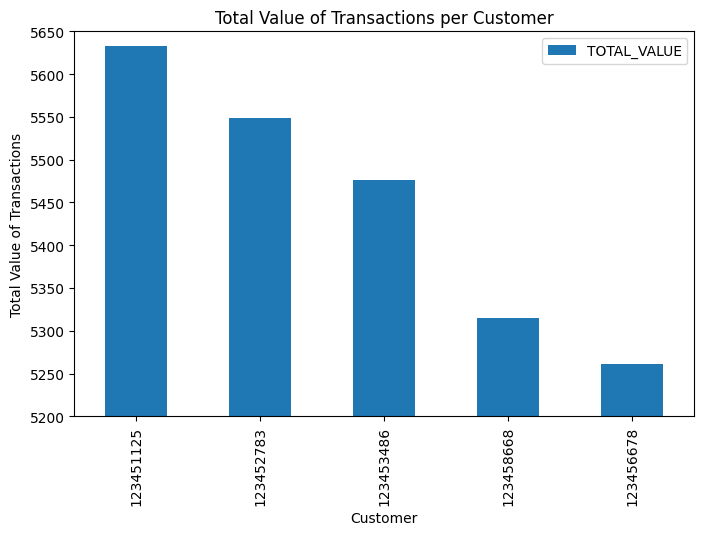

In [30]:
#df_cust_val.reset_index(inplace=True)
df_cust_val.head().plot(kind='bar', x='CUST_SSN', y='TOTAL_VALUE',  figsize=(8, 5))

# add a title to the histogram
pyplot.title('Total Value of Transactions per Customer')
# add y-label
pyplot.ylabel('Total Value of Transactions')
# add x-label
pyplot.xlabel('Customer')
pyplot.ylim(5200,5650)

pyplot.show()

In [6]:
spark.sql("SELECT CUST_SSN, COUNT(*) AS TOTAL_TRANSACTIONS \
            FROM credit GROUP BY CUST_SSN ORDER BY TOTAL_TRANSACTIONS DESC").show() 

+---------+------------------+
| CUST_SSN|TOTAL_TRANSACTIONS|
+---------+------------------+
|123453831|                99|
|123456678|                99|
|123451701|                99|
|123457070|                99|
|123458668|                99|
|123451357|                99|
|123456557|                98|
|123456849|                98|
|123458993|                98|
|123458645|                98|
|123452890|                98|
|123459441|                98|
|123455898|                98|
|123452026|                98|
|123451173|                98|
|123456862|                98|
|123458265|                98|
|123452783|                97|
|123457278|                97|
|123459723|                97|
+---------+------------------+
only showing top 20 rows



PART 4

In [24]:
import mysql.connector as mariadb
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName('Cap4.com').getOrCreate()
import requests
import json

In [25]:
url = 'https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json'
response = requests.get(url)

In [3]:
response

<Response [200]>

In [26]:
cdw_sapp_loan4 = response.json()

In [35]:
df_loan = spark.createDataFrame(cdw_sapp_loan4)
df_loan_quantum = spark.createDataFrame(cdw_sapp_loan4)

In [31]:
with open('cdw_sapp_loan4.json', 'w') as out_file:
     json.dump(cdw_sapp_loan4, out_file) 


In [32]:
df_loan_q2 = spark.read.json("cdw_sapp_loan4.json")

In [3]:
df_loan.show()

+--------------+------------------+--------------+----------+------------+------+------+-------+-------------+-------------+
|Application_ID|Application_Status|Credit_History|Dependents|   Education|Gender|Income|Married|Property_Area|Self_Employed|
+--------------+------------------+--------------+----------+------------+------+------+-------+-------------+-------------+
|      LP001002|                 Y|             1|         0|    Graduate|  Male|medium|     No|        Urban|           No|
|      LP001003|                 N|             1|         1|    Graduate|  Male|medium|    Yes|        Rural|           No|
|      LP001005|                 Y|             1|         0|    Graduate|  Male|   low|    Yes|        Urban|          Yes|
|      LP001006|                 Y|             1|         0|Not Graduate|  Male|   low|    Yes|        Urban|           No|
|      LP001008|                 Y|             1|         0|    Graduate|  Male|medium|     No|        Urban|           No|


In [5]:
df_loan.printSchema()

root
 |-- Application_ID: string (nullable = true)
 |-- Application_Status: string (nullable = true)
 |-- Credit_History: long (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- Married: string (nullable = true)
 |-- Property_Area: string (nullable = true)
 |-- Self_Employed: string (nullable = true)



In [ ]:
df_loan_q2.write.format("jdbc") \
  .mode("append") \
  .option("url", "jdbc:mysql://localhost:3306/creditcard_capstone") \
  .option("dbtable", "CDW_SAPP_loan_application_q3") \
  .option("user", "root") \
  .option("password", "password") \
  .save()

Req-5
Data Analysis and Visualization

Functional Requirements 5.1
Find and plot the percentage of applications approved for self-employed applicants.
Note: Take a screenshot of the graph.
AMONG SELF-EMPLYED APPLICATIONS, THE PERCENTAGE OF APPLICATIONS APPROVED?
df.where(df.Education == 'Self-Employed')

Functional Requirements 5.2
Find the percentage of rejection for married male applicants.
Note: Take a screenshot of the graph.
AMONG MARRIED MALES, WHAT IS THE PERCENTAGE OF REJECTION?

Functional Requirements 5.3
Find and plot the top three months with the largest transaction data.
Note: Take a screenshot of the graph. 
LARGEST NUMBER? OR LARGEST TOTAL VALUE? BOTH?

Functional Requirements 5.4
Find and plot which branch processed the highest total dollar value of healthcare transactions.
Note: Take a screenshot of the graph. 



In [6]:
df_loan_se = df_loan.where(df_loan.Self_Employed == 'Yes')
df_loan_se.show()

+--------------+------------------+--------------+----------+------------+------+------+-------+-------------+-------------+
|Application_ID|Application_Status|Credit_History|Dependents|   Education|Gender|Income|Married|Property_Area|Self_Employed|
+--------------+------------------+--------------+----------+------------+------+------+-------+-------------+-------------+
|      LP001005|                 Y|             1|         0|    Graduate|  Male|   low|    Yes|        Urban|          Yes|
|      LP001011|                 Y|             1|         2|    Graduate|  Male|medium|    Yes|        Urban|          Yes|
|      LP001066|                 Y|             1|         0|    Graduate|  Male|medium|    Yes|    Semiurban|          Yes|
|      LP001097|                 N|             1|         1|    Graduate|  Male|medium|     No|        Rural|          Yes|
|      LP001136|                 Y|             1|         0|Not Graduate|  Male|medium|    Yes|        Urban|          Yes|


In [9]:
df_loan_se.createOrReplaceTempView('self_employed')


In [37]:
spark.sql("select count(*) from self_employed").show()

+--------+
|count(1)|
+--------+
|      70|
+--------+



In [38]:
spark.sql("select count(*) from self_employed WHERE Application_Status == 'Y'").show()

+--------+
|count(1)|
+--------+
|      46|
+--------+



In [40]:
percent = round((46/70)*100,2)
print(f"The percentage of applications approved for self-employed applicants is {percent}%.")

The percentage of applications approved for self-employed applicants is 65.71%.


NOW PLOT THE PERCENT FOR SELF-EMPLOYED

In [43]:
df_loan_sepd = df_loan_se.toPandas()

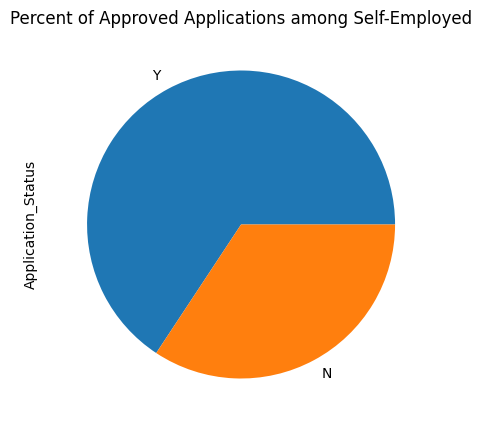

In [48]:
#df_cust_val.reset_index(inplace=True)
df_loan_sepd['Application_Status'].value_counts().plot(kind='pie', x='CUST_SSN', y='TOTAL_VALUE',  figsize=(8, 5))

# add a title to the histogram
pyplot.title('Percent of Approved Applications among Self-Employed')
# add y-label


pyplot.show()

Functional Requirements 5.2
Find the percentage of rejection for married male applicants.
Note: Take a screenshot of the graph.

In [50]:
df_loan_m = df_loan.where(df_loan.Married == 'Yes')
df_loan_mm = df_loan_m.where(df_loan_m.Gender == 'Male')
df_loan_mm.show()

+--------------+------------------+--------------+----------+------------+------+------+-------+-------------+-------------+
|Application_ID|Application_Status|Credit_History|Dependents|   Education|Gender|Income|Married|Property_Area|Self_Employed|
+--------------+------------------+--------------+----------+------------+------+------+-------+-------------+-------------+
|      LP001003|                 N|             1|         1|    Graduate|  Male|medium|    Yes|        Rural|           No|
|      LP001005|                 Y|             1|         0|    Graduate|  Male|   low|    Yes|        Urban|          Yes|
|      LP001006|                 Y|             1|         0|Not Graduate|  Male|   low|    Yes|        Urban|           No|
|      LP001011|                 Y|             1|         2|    Graduate|  Male|medium|    Yes|        Urban|          Yes|
|      LP001013|                 Y|             1|         0|Not Graduate|  Male|   low|    Yes|        Urban|           No|


In [51]:
df_loan_mm.createOrReplaceTempView('married_men')
spark.sql("select count(*) from married_men").show()

+--------+
|count(1)|
+--------+
|     306|
+--------+



In [82]:
spark.sql("select count(*) from married_men WHERE Application_Status == 'N'").show()

+--------+
|count(1)|
+--------+
|      87|
+--------+



In [83]:
percent = round((87/306)*100,2)
print(f"The percentage of applications rejected for married male applicants is {percent}%.")

The percentage of applications rejected for married male applicants is 28.43%.


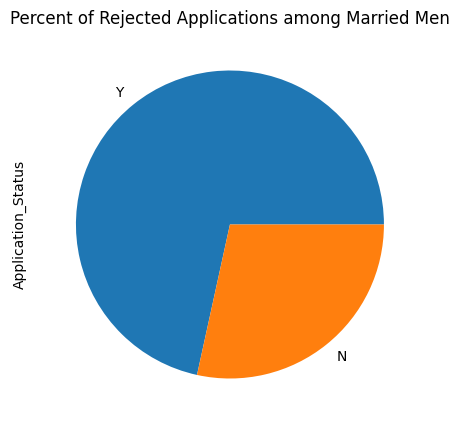

In [84]:
df_loan_mmpd = df_loan_mm.toPandas()
df_loan_mmpd['Application_Status'].value_counts().plot(kind='pie', figsize=(8, 5))

# add a title to the histogram
pyplot.title('Percent of Rejected Applications among Married Men')
# add y-label


pyplot.show()

Functional Requirements 5.3
Find and plot the top three months with the largest transaction data.
Note: Take a screenshot of the graph. 
LARGEST NUMBER? OR LARGEST TOTAL VALUE? BOTH?

In [88]:
df_month_num = spark.sql("SELECT MONTH, COUNT(TRANSACTION_ID) AS TRANSACTIONS FROM credit \
            GROUP BY MONTH ORDER BY TRANSACTIONS DESC LIMIT 3").toPandas()
df_month_num.head()

,MONTH,TRANSACTIONS
0,2,3959
1,5,3946
2,10,3946


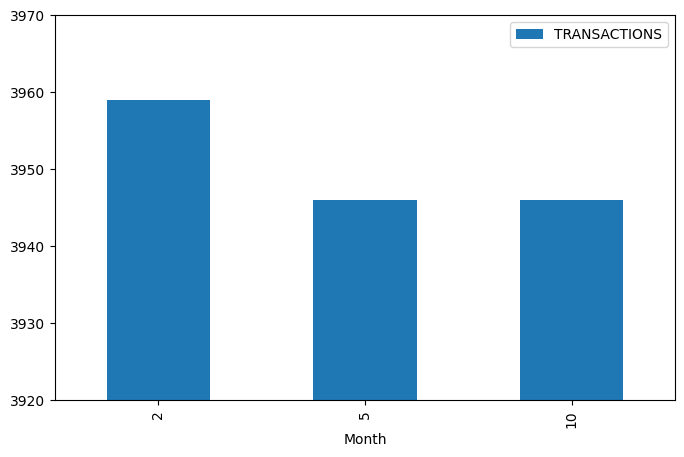

In [89]:

#df_month.set_index(['MONTH'])
df_month_num.plot(kind = "bar", x = 'MONTH', y = 'TRANSACTIONS', figsize = (8,5))
pyplot.ylim(3920,3970)
pyplot.xlabel('Month')
pyplot.show()

In [71]:
df_month = spark.sql("SELECT MONTH, SUM(TRANSACTION_VALUE) AS TRANSACTION_SUM FROM credit \
            GROUP BY MONTH ORDER BY TRANSACTION_SUM DESC LIMIT 3").toPandas()

In [72]:
df_month.head()

,MONTH,TRANSACTION_SUM
0,10,202583.89
1,5,201310.26
2,12,201251.08


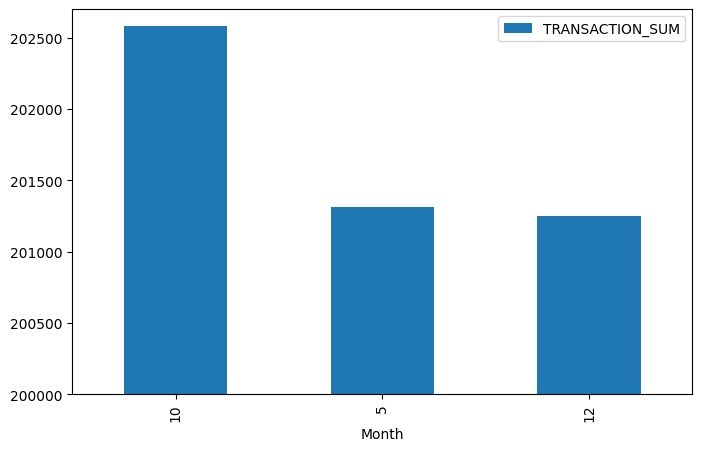

In [81]:

#df_month.set_index(['MONTH'])
df_month.plot(kind = "bar", x = 'MONTH', y = 'TRANSACTION_SUM', figsize = (8,5))
pyplot.ylim(200000,202700)
pyplot.xlabel('Month')
pyplot.show()

Functional Requirements 5.4
Find and plot which branch processed the highest total dollar value of healthcare transactions.
Note: Take a screenshot of the graph. 

In [91]:
df_healthc = spark.sql("SELECT BRANCH_CODE, SUM(TRANSACTION_VALUE) AS TRANSACTION_SUM \
                FROM credit GROUP BY BRANCH_CODE ORDER BY TRANSACTION_SUM DESC LIMIT 5").toPandas()
df_healthc.head()


,BRANCH_CODE,TRANSACTION_SUM
0,70,23792.89
1,79,23641.99
2,46,23507.66
3,45,23350.68
4,37,22991.33


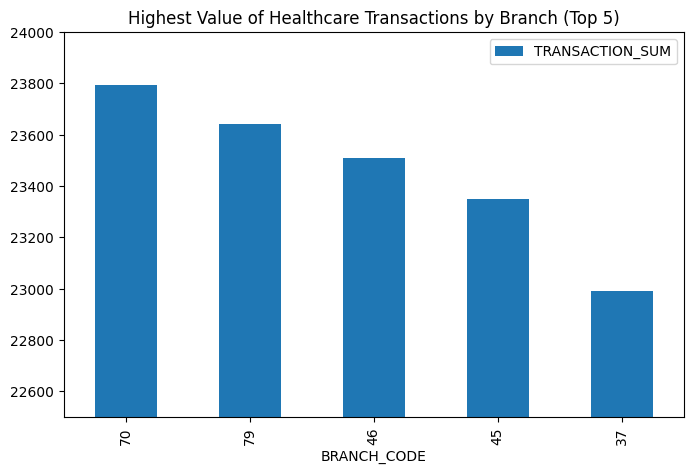

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 64919)
Traceback (most recent call last):
  File "C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "C:\Users\jerem\AppData\Local\Programs\Python\Python310\lib\socketserver.py", line 747, in __init__
    self.handle()
  File "c:\Users\jerem\Per_scholas_python_practice\capstone_work\lib\site-packages\pyspark\accumulators.py", line 281, in handle
    poll(accum_updates)
  File "c:\Users\jerem\Per_scholas_python_practice\capstone_work

In [94]:
df_healthc.plot(kind='bar', x='BRANCH_CODE', y='TRANSACTION_SUM',  figsize=(8, 5))

# add a title to the histogram
pyplot.title('Highest Value of Healthcare Transactions by Branch (Top 5)')
# add y-label
pyplot.ylim(22500,24000)

pyplot.show()